# **Customer segmentation**

**overview**

This project applies unsupervised learning techniques to perform customer segmentation based on demographic and behavioral data. Using clustering algorithms like K-Means and DBSCAN, customers are grouped into meaningful segments that reflect their spending patterns and preferences. Dimensionality reduction methods such as PCA are used to visualize high-dimensional data in 2D or 3D, while EDA helps uncover key patterns and correlations. The results provide actionable insights for targeted marketing, personalized recommendations, and strategic business decisions.

 __Table of Contents__

 <ol>
    <li>
        <a href="#Setup">Importing Required Libraries</a>
    </li>
    <li>
        <a href="#Data Exploration">Data Exploration</a>
        <ol>
            <li><a href="#Checking Null Values">Checking Null Values</a></li>
            <li><a href="#Checking Duplicates Values">Checking Null Values</a></li>
            <li><a href="#Statistic Sumary">Statistic Sumary</a></li>
            <li><a href="#Numerical Features">Identify Numerical Features</a></li>
            <li><a href="#Categorical Features">Identify Categorical Features</a></li>
            <li><a href="#Data Visualisation">Data Visualisation</a></li>
            <li><a href="#Correlation"> Correlation</a></li>
            <li><a href="#Checking Outliers">Checking Outliers</a></li>
        </ol>
    </li>
    <li>
        <a href="#Setup">Preprocessing</a>
        <ol>
            <li><a href="#Handle Missing Data">Handle Missing Data</a></li>
            <li><a href="#Label Encoding">Label Encoding</a></li>
            </li>
            </li>
            <li><a href="#Scaling">Scaling/Normalization</a></li>
            <li><a href="#Scaling">Dimensionality Reduction </a> </li>
            </li>
        </ol>
    </li>
    <li>
        <a href="#Setup">Clustering Algorithms</a>
        <ol>
            <li><a href="#KMeans">KMeans</a></li>
            <li><a href="#DBSCAN">DBSCAN</a></li>
            <li><a href="#Cluster Visualization">Cluster Visualization</a></li>
           </li>
            </li>
        </ol>
    </li>
    <li>
        <a href="#Evaluation">Evaluation</a>
        <ol>
            <li><a href="#MAE">Mean Absolute Error (MAE)</a></li>
            <li><a href="#MSE">Mean Squared Error (MSE)</a></li>
            <li><a href="#">Root Mean Squared Error (RMSE)</a></li>
           </li>
            </li>
        </ol>
    </li>

  
    
    
</ol>

#Setup

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#Data visualisation

*   Loading datasets
*   Merging datasets



In [2]:
df_train = pd.read_csv('/content/customer_dataset/Train.csv')
df_test = pd.read_csv('/content/customer_dataset/Test.csv')
df = pd.concat([df_train,df_test],axis=0,ignore_index=True)

# Showing Our Dataset Shape

In [3]:
df.shape

(10695, 11)

# Verification

* Checking For NA Values
* Checking For Duplicates Values

In [4]:
df.isna().sum().sum()

np.int64(4735)

In [5]:
df.isna().sum()

,0
ID,0
Gender,0
Ever_Married,190
Age,0
Graduated,102
Profession,162
Work_Experience,1098
Spending_Score,0
Family_Size,448
Var_1,108


For a better visualisation, let's use a bar graph to display columns with missing values

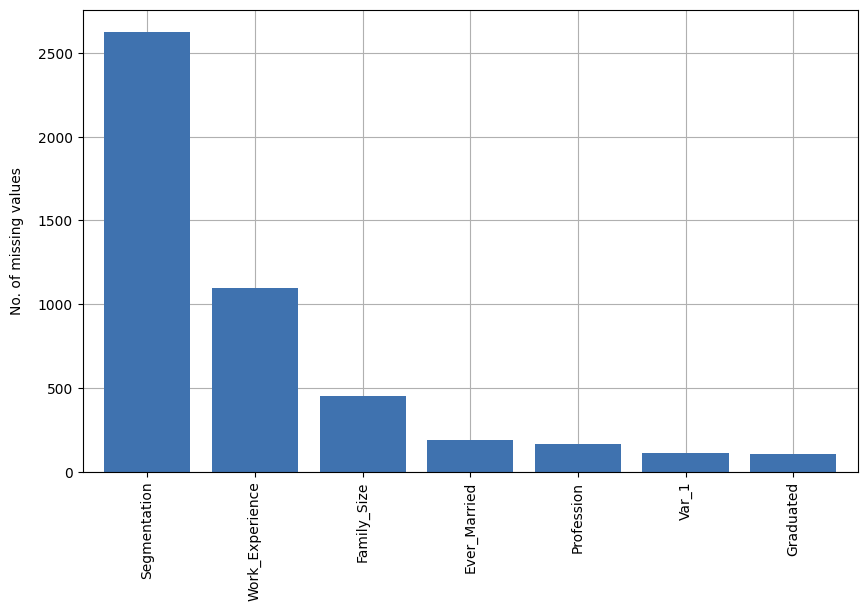

In [6]:
nans = df.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [7]:
df[df.duplicated()].shape

(0, 11)

```
# Infos On Our Data

Showing information about our datasets, the number of lines, null values, and column type
```


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


```
# Summary On Our Data

Quick summary of the statistics for the numerical columns in my DataFrame
```

In [10]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# Numerical Features

In [11]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')


# Categorical Features

In [29]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')


Age Distribution

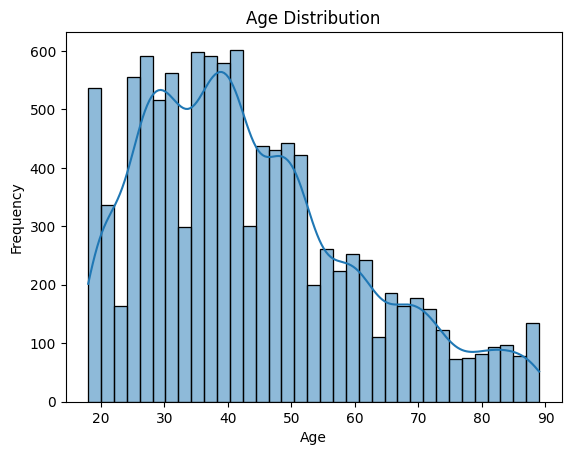

In [30]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Distribution Of Numerical Features

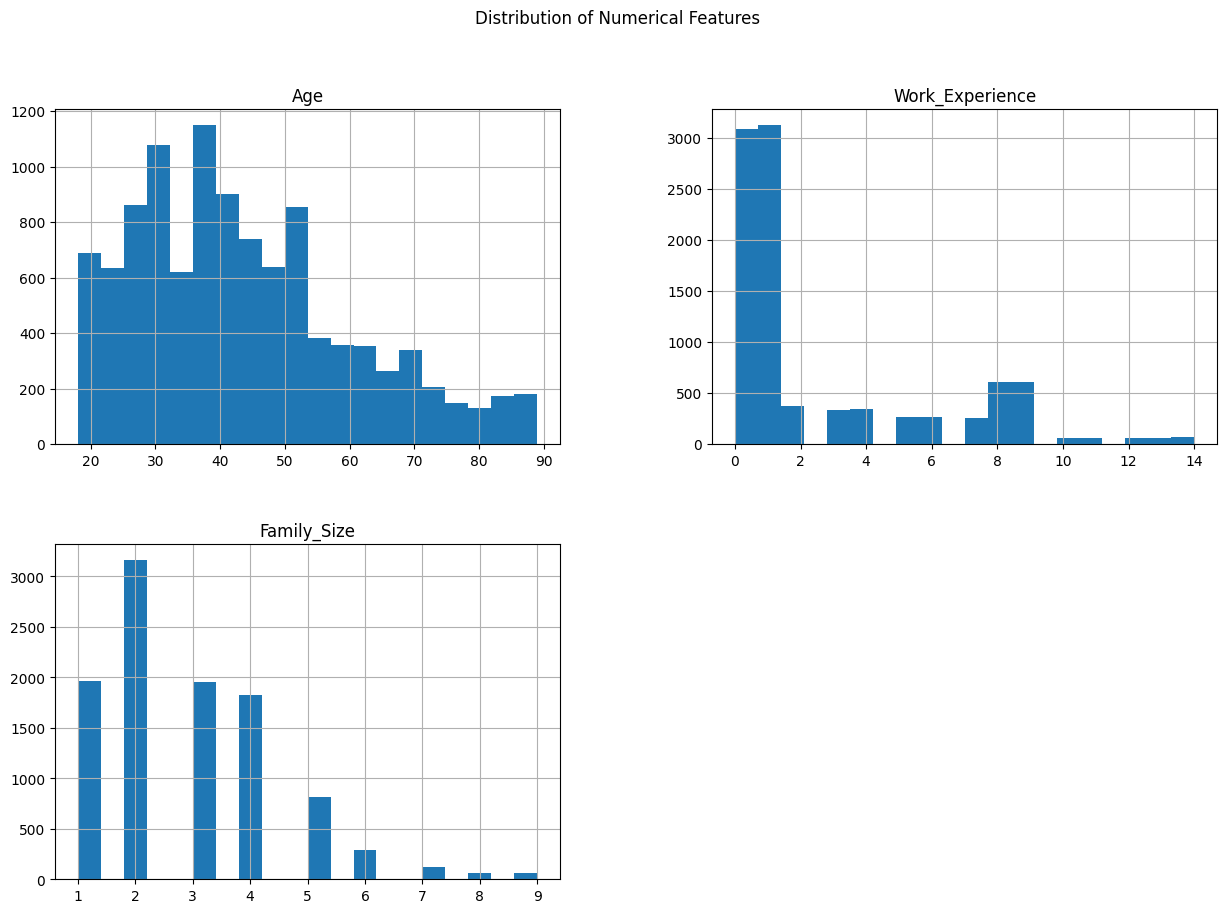

In [31]:
df[numerical_features[1:15]].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

Compute Correlation Matrix

In [32]:
corr_matrix = df[numerical_features[1:]].corr()
print(corr_matrix)

                      Age  Work_Experience  Family_Size
Age              1.000000        -0.189653    -0.281725
Work_Experience -0.189653         1.000000    -0.065163
Family_Size     -0.281725        -0.065163     1.000000


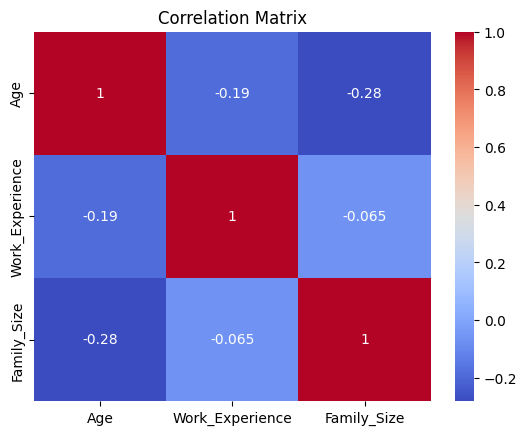

In [33]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
gender_counts = pd.Series(df['Gender']).value_counts()
graduated_counts = pd.Series(df['Graduated']).value_counts()
profession_counts = pd.Series(df['Profession']).value_counts()
segmentation_counts = pd.Series(df['Segmentation']).value_counts()
evermarried_counts = pd.Series(df['Ever_Married']).value_counts()
spendindscore_counts = pd.Series(df['Spending_Score']).value_counts()

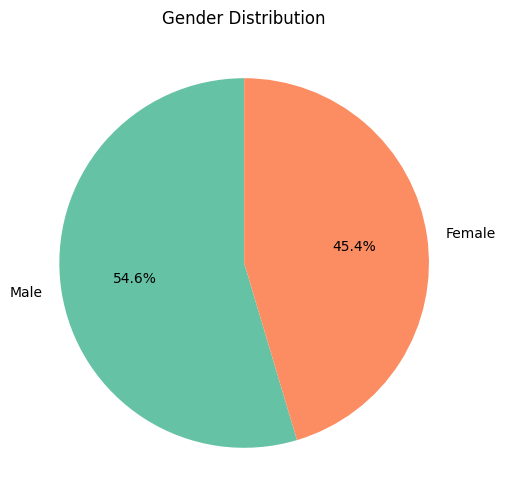

In [35]:
plt.figure(figsize=(6, 6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(gender_counts)))
plt.title('Gender Distribution')
plt.show()

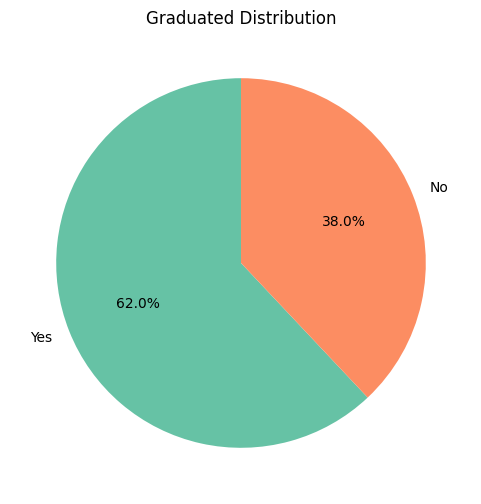

In [36]:

plt.figure(figsize=(6, 6))
plt.pie(graduated_counts,labels=graduated_counts.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(graduated_counts)))
plt.title('Graduated Distribution')
plt.show()

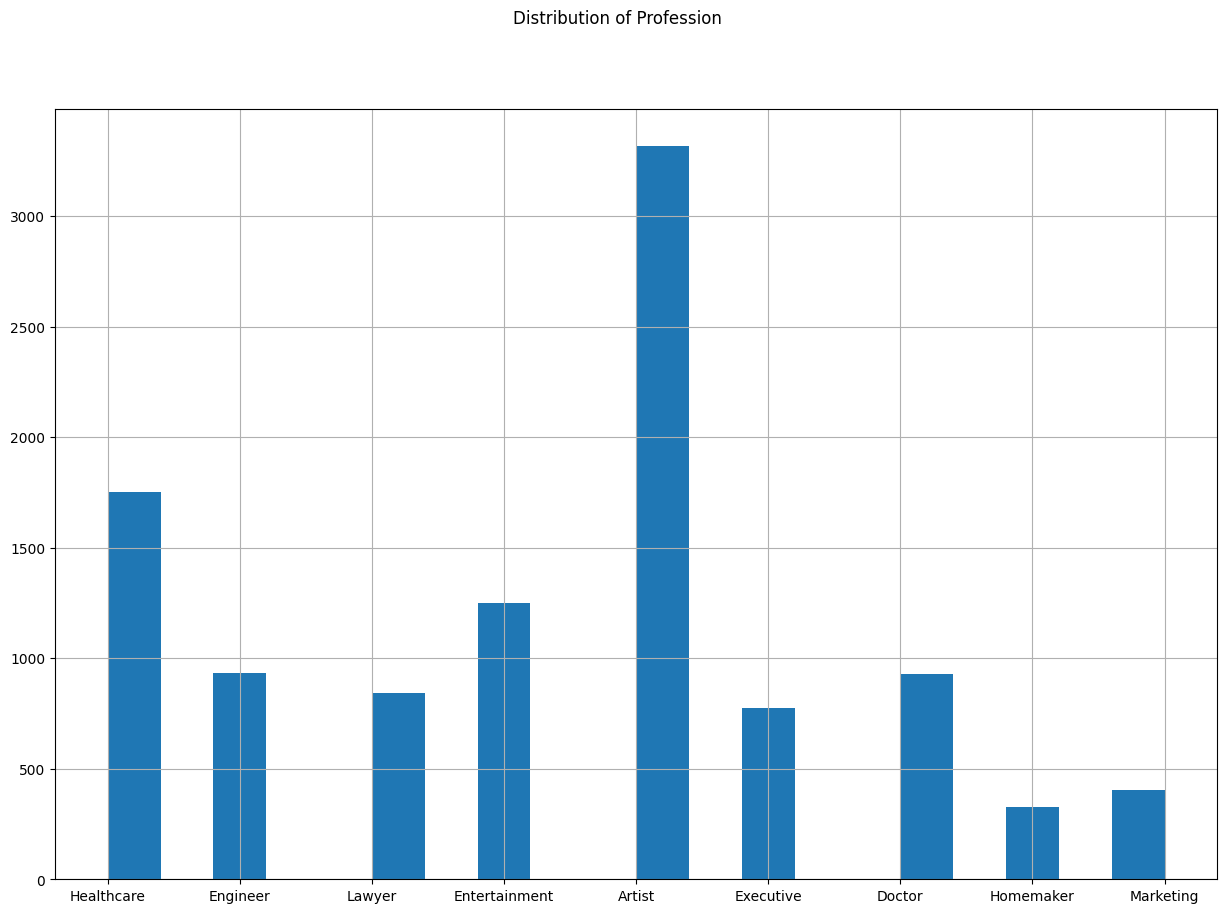

In [37]:
df['Profession'].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Profession')
plt.show()


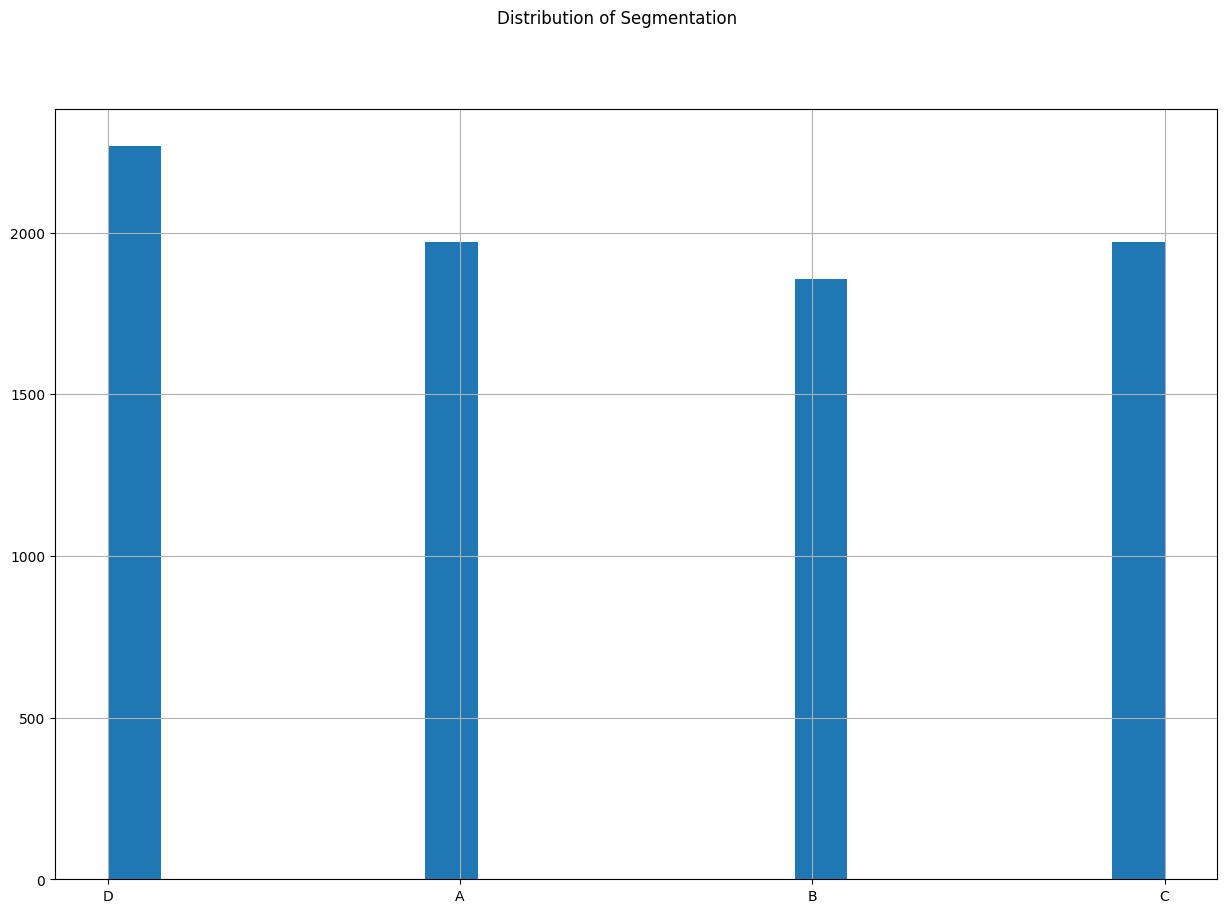

In [38]:
df['Segmentation'].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Segmentation')
plt.show()

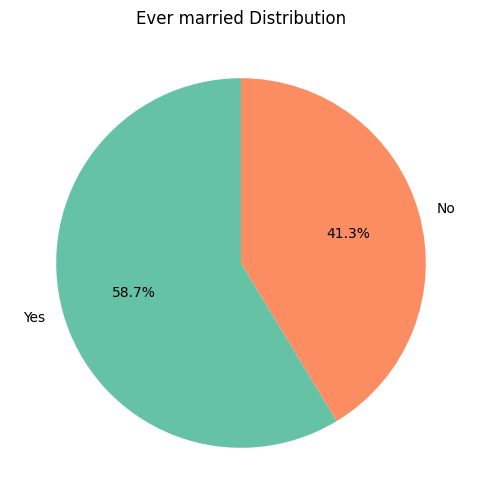

In [39]:
plt.figure(figsize=(6, 6))
plt.pie(evermarried_counts,labels=evermarried_counts.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(evermarried_counts)))
plt.title('Ever married Distribution')
plt.show()

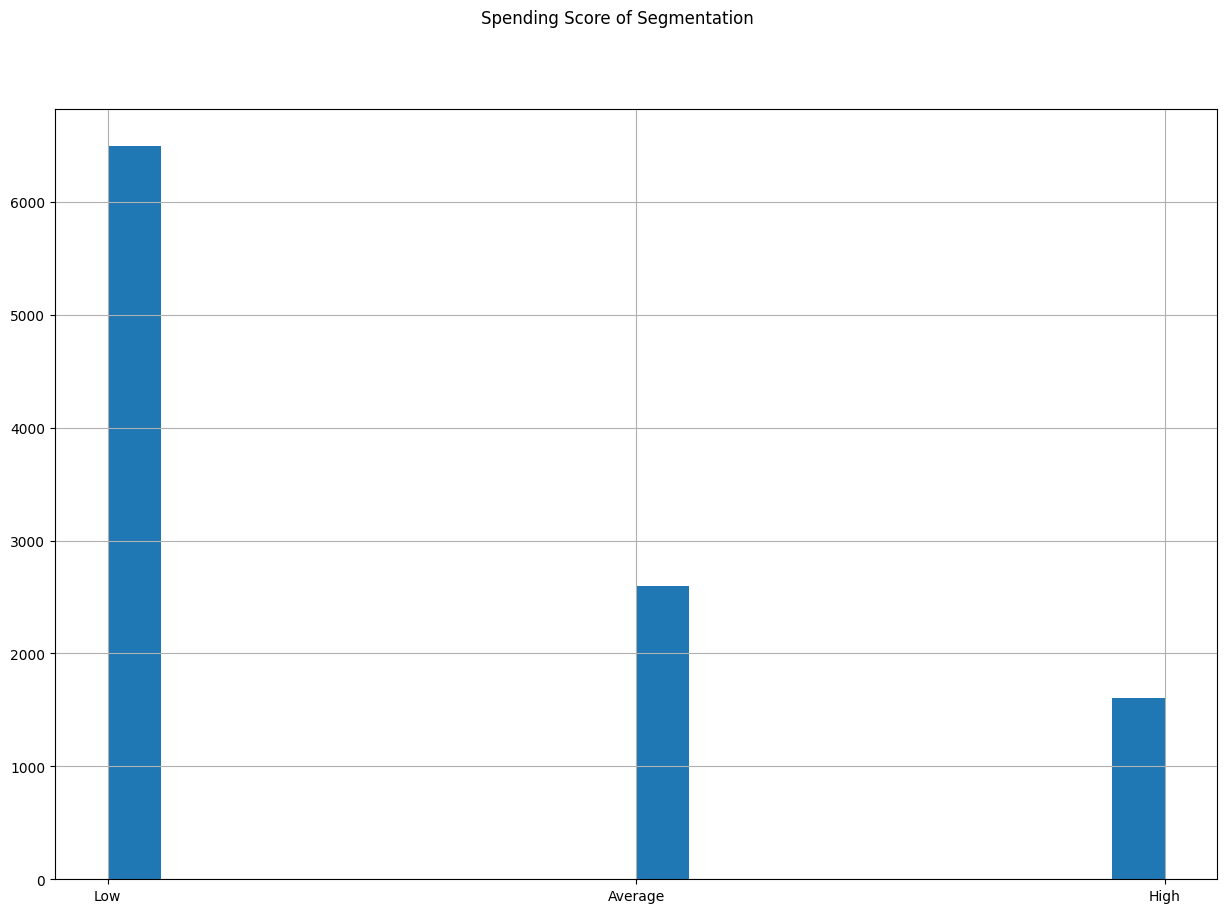

In [40]:
df['Spending_Score'].hist(figsize=(15, 10), bins=20)
plt.suptitle('Spending Score of Segmentation')
plt.show()

Checking if we have outliers

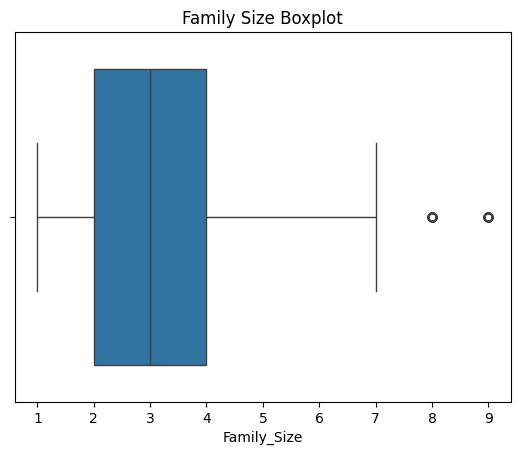

In [41]:
sns.boxplot(x=df['Family_Size'])
plt.title('Family Size Boxplot')
plt.show()

In [42]:
df.isna().sum()

,0
ID,0
Gender,0
Ever_Married,190
Age,0
Graduated,102
Profession,162
Work_Experience,1098
Spending_Score,0
Family_Size,448
Var_1,108


# Data inputation
```
# Categorical values

For the categorical values, we are going to replace null values with the mode
```

```
# Numerical values

For the numerical values, we are going to use KNNImputer to find the missing values
```


In [48]:
imputer = KNNImputer(n_neighbors=3)
df[numerical_features] = imputer.fit_transform(df[numerical_features])

In [51]:
for col in categorical_features.to_list():
  mode_value = df[col].mode()[0]
  df[col] = df[col].fillna(mode_value)

# Checking if we still have NA values

In [52]:
df.isna().sum().sum()

np.int64(0)

#Apply label encoding on our categorical variables

In [54]:
categorical_columns = categorical_features.to_list()
label_encoder = LabelEncoder()
for col in categorical_columns:
  df[col] = label_encoder.fit_transform(df[col])

In [56]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [57]:
x_scaled

array([[-0.25341329,  0.91160413, -1.20960763, ...,  0.76085752,
        -0.8083675 ,  0.92961029],
       [-0.3172387 , -1.09696739,  0.82671436, ...,  0.10268941,
        -0.8083675 , -1.64120045],
       [ 1.09461024, -1.09696739,  0.82671436, ..., -1.21364683,
         0.60417893, -0.78426354],
       ...,
       [ 1.72709703, -1.09696739, -1.20960763, ..., -0.55547871,
         0.60417893,  0.92961029],
       [ 1.72748153,  0.91160413,  0.82671436, ...,  1.41902564,
        -0.8083675 ,  0.92961029],
       [ 1.73017296, -1.09696739, -1.20960763, ...,  0.10268941,
         1.31045214,  0.92961029]])

# Applying PCA

In [59]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [62]:
px.scatter(x=x_pca[:,0], y=x_pca[:,1], title='PCA Projection')

# Applying TSNE

In [65]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_scaled)

In [66]:
px.scatter(x=x_tsne[:,0], y=x_tsne[:,1], title='TSNE Projection')

# Apply KMeans Clustering Algorithms





```
# find the optimal number of clusters
```

In [68]:
n_clusters = []
for k in range(2,10):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(x_scaled)
  n_clusters.append(km.inertia_)

In [70]:
len(n_clusters)

8

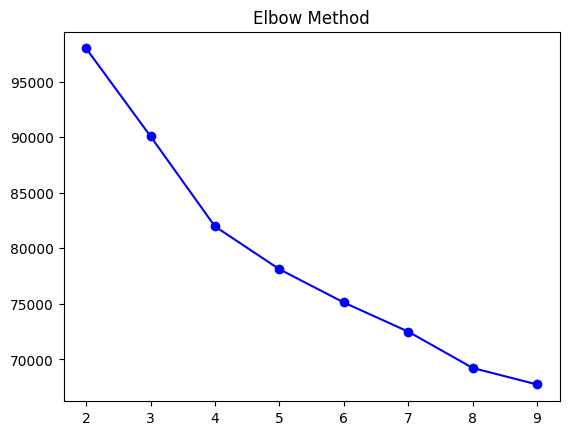

In [71]:
plt.plot(range(2,10), n_clusters, 'bo-')
plt.title('Elbow Method')
plt.show()

In [75]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(x_scaled)
df['Cluster'] = labels

In [78]:
pd.Series(df['Cluster']).value_counts()

,count
Cluster,
0,3282
1,2207
4,2004
3,1802
2,1400


# Apply DBSCAN Clustering Algorithms


In [80]:
db = DBSCAN(eps=0.5, min_samples=5).fit(x_scaled)
df['DBSCAN_Cluster'] = db.labels_

In [81]:
pd.Series(df['DBSCAN_Cluster']).value_counts()

,count
DBSCAN_Cluster,
-1,9522
5,156
25,54
4,46
2,32
...,...
97,5
104,5
107,5


# Cluster Visualization By Using Plotly

In [85]:
fig = px.scatter(
    x=x_pca[:,0],
    y=x_pca[:,1],
    color = df['Cluster'].astype(str),
    title = 'Customer Segments',
    hover_data = [df['Age'],df['Profession'],df['Spending_Score'],]
)

fig.show()